Detecting Fake News with Python and Machine Learning - Reproduction

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab\ Notebooks

#Read the data
df=pd.read_csv('news.csv')

#Get shape and head

df.shape
df.head()
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


Unnamed: 0                                              title  \
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

In [ ]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#TFIDF tells which word is important

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[590,  48],
       [ 42, 587]])

In [ ]:
#comparison of algo: https://www.youtube.com/watch?v=q5u1Us-dpo8
#https://www.youtube.com/results?search_query=deep+learning+fake+news

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


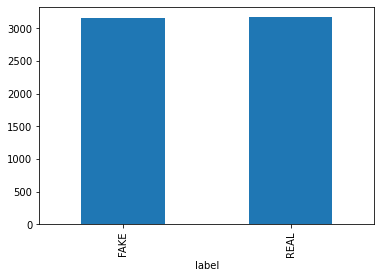

In [ ]:
#Perform some visualizations for the analysis
#How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind='bar')
plt.show()

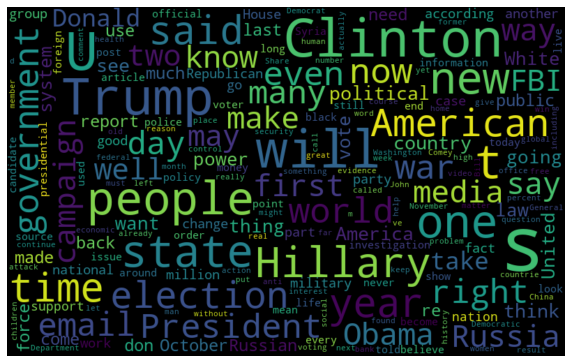

In [ ]:
from wordcloud import WordCloud
fake_data = df[df['label']=='FAKE']
all_words = '  '.join([text for text in fake_data.text])
wordcloud = WordCloud(width = 800, height = 500, max_font_size =  110, collocations= False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

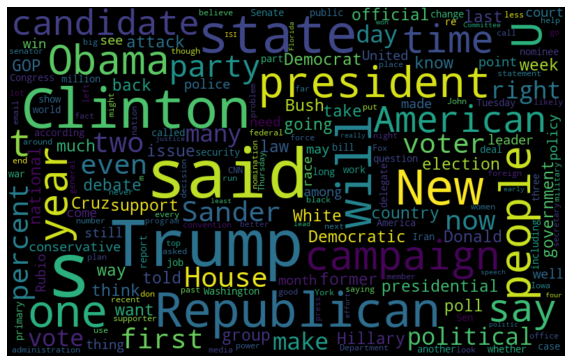

In [ ]:
from wordcloud import WordCloud
real_data = df[df['label']=='REAL']
all_words = '  '.join([text for text in real_data.text])
wordcloud = WordCloud(width = 800, height = 500, max_font_size =  110, collocations= False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Decision Tree

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


 #Vectorising and applying tf-idf
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                                  max_depth = 30,
                                                  splitter = 'best',
                                                  random_state = 42))])
#splitter: best vs random
#Fit the model
model = pipe.fit(x_train, y_train)

#Accuracy
prediction = model.predict(x_test)
print('accuracy: {}%'.format(round(accuracy_score(y_test, prediction)*100, 2)))

accuracy: 79.79%


Confusion matrix, without normalization


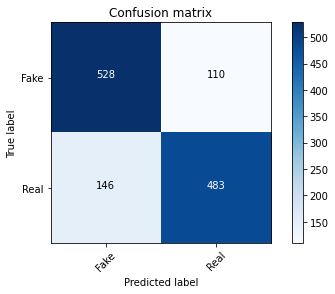

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print ('normalized confusion matrix')
  else: 
      print('Confusion matrix, without normalization')
  threshold = cm.max() / 2,
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j],
             horizontalalignment = "center",
             color = "white" if cm[i,j] > threshold else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

1.   Test case no. = 6335 * 0.2 = 1267
2.   Accuracy = (483 + 528) / 1267 = 79.8%
3.  Precision (Sensitivity) = 483 / (483 + 110) = 81.5%
4.  Specificity = 528 / (528 + 110) = 82.8%






In [ ]:
#https://www.youtube.com/watch?v=DdgymahD7Zg

LSTM


In [ ]:
#LSTM
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences 

In [ ]:
#data cleaning
df = df.dropna(axis = 0)
df['clean_news'] = df['text'].str.lower()
df['clean_news']

0       daniel greenfield, a shillman journalism fello...
1       google pinterest digg linkedin reddit stumbleu...
2       u.s. secretary of state john f. kerry said mon...
3       — kaydee king (@kaydeeking) november 9, 2016 t...
4       it's primary day in new york and front-runners...
                              ...                        
6330    the state department told the republican natio...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332     anti-trump protesters are tools of the oligar...
6333    addis ababa, ethiopia —president obama convene...
6334    jeb bush is suddenly attacking trump. here's w...
Name: clean_news, Length: 6335, dtype: object

In [ ]:
df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9]','  ')
df['clean_news'] = df['clean_news'].str.replace('\n', '') #no create a new line
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ') #string of non-whitespace characters
df['clean_news']

<ipython-input-19-433b6b55d6ce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9]','  ')
<ipython-input-19-433b6b55d6ce>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_news'] = df['clean_news'].str.replace('\s+', ' ') #string of non-whitespace characters


0       daniel greenfield a shillman journalism fellow...
1       google pinterest digg linkedin reddit stumbleu...
2       u s secretary of state john f kerry said monda...
3        kaydee king kaydeeking november 9 2016 the le...
4       it s primary day in new york and front runners...
                              ...                        
6330    the state department told the republican natio...
6331    the p in pbs should stand for plutocratic or p...
6332     anti trump protesters are tools of the oligar...
6333    addis ababa ethiopia president obama convened ...
6334    jeb bush is suddenly attacking trump here s wh...
Name: clean_news, Length: 6335, dtype: object

In [ ]:
#remove stopwords
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                          clean_news  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  u secretary state john f kerry said monday sto...  
3  kaydee king kaydeeking november 9 2016 lesson ...  
4  primary day new york front runners hillary cli...

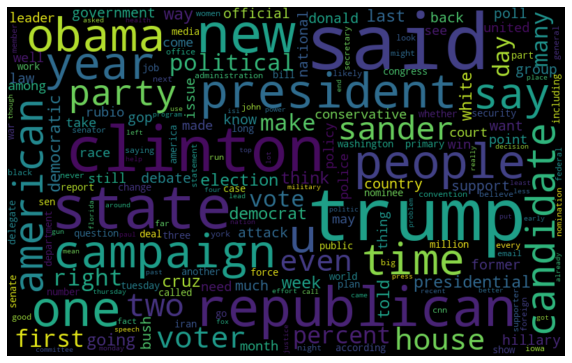

In [ ]:
#visualize and plot graph for real news
from wordcloud import WordCloud
all_words = '  '.join([text for text in df['clean_news'][df['label']=="REAL"]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size =  110, collocations= False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

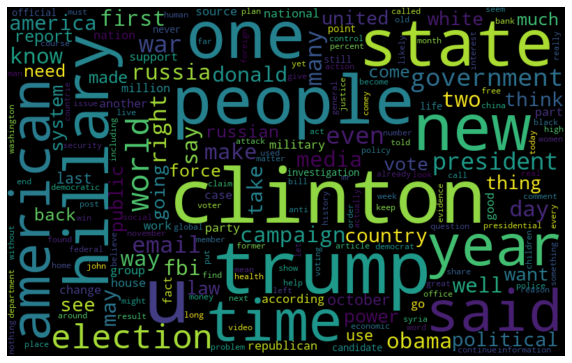

In [ ]:
#visualize and plot graph for fake news
from wordcloud import WordCloud
all_words = '  '.join([text for text in df['clean_news'][df['label']=="FAKE"]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size =  110, collocations= False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
df['label'].replace({'REAL':1,'FAKE':0}, inplace = True)


In [ ]:
#tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

66805

In [ ]:
#padding data
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen = 600, padding = 'post', truncating = 'post')

In [ ]:
# download pretrained GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2023-02-04 04:20:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-02-04 04:20:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-02-04 04:20:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... ^C


In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
#create embedding matrix
import os
glove_dir = './'
embedding_index = {} #initialize dictionary
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1: ], dtype = 'float32')
    embedding_index[word] = coefs




In [ ]:
#create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_matrix[1]

array([-0.15730999, -0.75502998,  0.36844999, -0.18957999, -0.16896001,
       -0.23157001, -0.22657999, -0.30186   ,  0.24372   ,  0.61896002,
        0.58995003,  0.047638  , -0.055164  , -0.70210999,  0.22084001,
       -0.69231999,  0.49419001,  1.42850006, -0.25362   ,  0.20031001,
       -0.26192001,  0.05315   , -0.048418  , -0.44982001,  0.54644001,
       -0.014645  , -0.015531  , -0.61197001, -0.91964   , -0.75279999,
        0.64842999,  1.0934    ,  0.052682  ,  0.33344999,  0.10532   ,
        0.59517002,  0.023104  , -0.37105   ,  0.29749   , -0.23683   ,
        0.079566  , -0.10326   ,  0.35885   , -0.28935   , -0.19881   ,
        0.22908001, -0.061435  ,  0.56127   , -0.017115  , -0.32868001,
       -0.78416997, -0.49375001,  0.34944001,  0.16278   , -0.061168  ,
       -1.31060004,  0.39151999,  0.124     , -0.20873   , -0.18472999,
       -0.56184   ,  0.55693001,  0.012114  , -0.54544997, -0.31409001,
        0.1       ,  0.31542999,  0.74756998, -0.47734001, -0.18

In [ ]:
#Input split
padded_seq[0]
padded_seq[1]

array([ 1960,  7721, 16045, 12178,  6681, 16046,  1967, 10759,  4584,
       13762,    22,  2057,  6762,    32,   296,   513,  4120,   495,
           9,   296,   513,    98,     9,   141,  2722,   685,  5790,
         460,    29, 16047,   296,   513,  5674,   284,   502,    57,
           1,  2381, 43931,   453,   265,  1187,  1123,     4,   916,
        2213,     1,  2850,    65,    74,     1,  7989,  8852,   106,
        2359,   513,  4209,   760,     1,   586, 15365,  3255,   152,
         547,    68,    41,     9,    62,    19, 12907,   529, 14773,
          20,    21, 35328,  7205,   203,   621, 18571,  1806,  1104,
        7990,  2529, 22553,    77,   817,  7602,    61,    16,   124,
         234,  1867,   768, 43932,  2301,   393,   222, 43933,  1760,
          36,   223, 35329,   225,   237,    53,    50,    21,   210,
         183,   529,  2020,   513,  2382,   239,  1209,     9,   395,
        1559,  7387,  7603,     1,   561,   280,  1667, 35330,  1013,
          13,  6439,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size = 0.20, random_state = 40, stratify = df['label'])

In [ ]:
#model training
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

model = Sequential([
    Embedding(vocab_size + 1, 100, weights = [embedding_matrix], trainable = False),
    Dropout(0.2),
    LSTM(128, return_sequences = True),
    LSTM(128),
    Dropout(0.2),
    Dense(512),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation = 'sigmoid')
]
)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         6680600   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, None, 128)         117248    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [ ]:
y_train

1567    0
4522    1
5000    0
4561    0
4977    0
       ..
5620    0
1997    1
4520    1
5067    0
696     0
Name: label, Length: 5068, dtype: int64

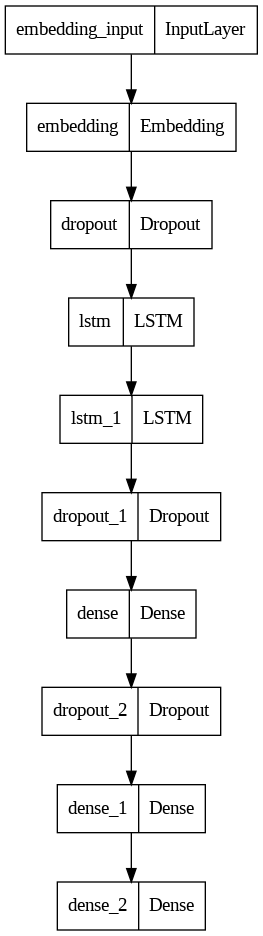

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [ ]:
#train the model

history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = [x_test, y_test])


Epoch 1/10
40/40 [==============================] - 206s 5s/step - loss: 0.6340 - accuracy: 0.6377 - val_loss: 0.6447 - val_accuracy: 0.6164
Epoch 2/10
40/40 [==============================] - 207s 5s/step - loss: 0.6232 - accuracy: 0.6166 - val_loss: 0.6056 - val_accuracy: 0.6977
Epoch 3/10
40/40 [==============================] - 204s 5s/step - loss: 0.5335 - accuracy: 0.7729 - val_loss: 0.5319 - val_accuracy: 0.7522
Epoch 4/10
40/40 [==============================] - 204s 5s/step - loss: 0.6556 - accuracy: 0.5906 - val_loss: 0.6884 - val_accuracy: 0.5146
Epoch 5/10
40/40 [==============================] - 204s 5s/step - loss: 0.6920 - accuracy: 0.5245 - val_loss: 0.6882 - val_accuracy: 0.5146
Epoch 6/10
40/40 [==============================] - 205s 5s/step - loss: 0.6870 - accuracy: 0.5199 - val_loss: 0.6850 - val_accuracy: 0.4996
Epoch 7/10
40/40 [==============================] - 209s 5s/step - loss: 0.6797 - accuracy: 0.5298 - val_loss: 0.6619 - val_accuracy: 0.5975
Epoch 8/10
40

In [ ]:
#model training - change model
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

model = Sequential([
    Embedding(vocab_size + 1, 100, weights = [embedding_matrix], trainable = False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation = 'sigmoid')
]
)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = [x_test, y_test])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         6680600   
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

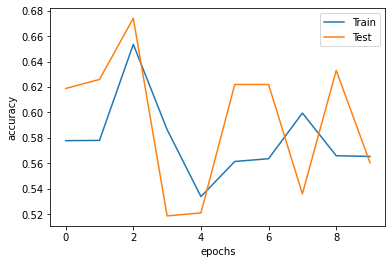

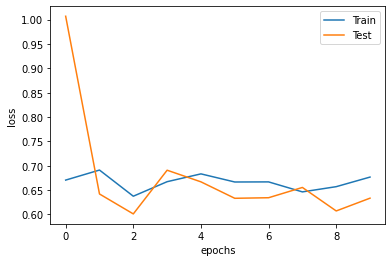

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Test'])
plt.show()